### Recipes 5k

* [Dataset](http://www.ub.edu/cvub/recipes5k/)

* [Original Paper](https://www.researchgate.net/publication/318729535_Food_Ingredients_Recognition_through_Multi-label_Learning)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/Recipes5k/'
COLUMN = 'embeddings'

In [3]:
text_path, images_path = os.listdir(PATH)

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,image,class,split,ingredients,embeddings
0,onion_rings/0_einkorn_onion_rings_hostedLargeU...,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal...","[1.1028140783309937, -1.5013680458068848, -0.3..."
1,onion_rings/1_crispy_onion_rings_hostedLargeUr...,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio...","[0.2510446310043335, -0.8487659692764282, -0.7..."
2,onion_rings/2_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l...","[0.6824526786804199, -1.090896487236023, 0.987..."
3,onion_rings/3_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"oil,pancake mix,spanish onion","[2.3841049671173096, -5.021180629730225, -0.17..."
4,onion_rings/4_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,...","[2.3817403316497803, 0.37943604588508606, -3.5..."
...,...,...,...,...,...
4821,chocolate_ice_cream/45_chocolate_ice_cream_hos...,chocolate_ice_cream,train,"dark chocolate,whole milk,unsweetened cocoa po...","[1.4988073110580444, -0.4912002980709076, 1.06..."
4822,chocolate_ice_cream/46_dark_chocolate_ice_crea...,chocolate_ice_cream,train,"half & half,whole milk,heavy cream,sugar,sea s...","[0.7600823640823364, 0.5964796543121338, 0.303..."
4823,chocolate_ice_cream/47_the_darkest_chocolate_i...,chocolate_ice_cream,train,"unsweetened cocoa powder,brewed coffee,granula...","[1.6432948112487793, -1.712591290473938, 1.486..."
4824,chocolate_ice_cream/48_homemade_chocolate_ice_...,chocolate_ice_cream,train,"unsweetened cocoa powder,sugar,firmly packed b...","[2.056760549545288, -1.5574166774749756, -0.36..."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,onion_rings/0_einkorn_onion_rings_hostedLargeU...,5.255562,-1.102281,3.221878,-0.848734,1.142476,1.436065,0.303136,-2.795287,-1.534621,...,0.145026,-0.173223,-1.631687,-1.373413,-1.700477,2.993020,-0.123423,0.482150,0.335781,0.164388
1,onion_rings/1_crispy_onion_rings_hostedLargeUr...,-0.180872,0.357785,2.953790,-0.514284,3.046458,3.261230,-0.069414,-2.036384,-0.755874,...,1.585758,1.397843,-2.597118,-1.620306,1.528063,-1.035716,1.339101,-1.978144,-0.381255,-0.014164
2,onion_rings/2_onion_rings_hostedLargeUrl.jpg,5.125897,-0.426740,3.452004,-2.458713,1.216147,0.867196,0.016434,-1.605688,-1.242954,...,0.984198,1.104070,-2.185897,0.033494,-1.515771,2.490174,-1.488795,1.110195,0.044147,0.145058
3,onion_rings/3_onion_rings_hostedLargeUrl.jpg,4.048971,-0.883851,3.259991,-1.269905,2.037031,0.474060,2.139239,-1.652627,-1.356481,...,0.464018,0.658732,-1.866643,-0.403469,-0.583548,2.141593,0.015457,0.862089,-1.321241,0.749305
4,onion_rings/4_onion_rings_hostedLargeUrl.jpg,2.488026,2.054659,3.591714,-2.157786,0.088067,2.232692,0.783981,-2.377056,1.325430,...,0.527386,0.913060,-2.255255,0.041726,-0.814133,1.396166,0.624918,0.262062,-0.816889,-1.154006


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image", "ImageName")
df.head()

,class,split,ingredients,text_1,text_2,text_3,text_4,text_5,text_6,text_7,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal...",1.102814,-1.501368,-0.301835,-1.239182,-0.910469,-0.634073,0.839440,...,0.145026,-0.173223,-1.631687,-1.373413,-1.700477,2.993020,-0.123423,0.482150,0.335781,0.164388
1,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio...",0.251045,-0.848766,-0.742973,-1.274160,-2.171595,0.156482,-0.167365,...,1.585758,1.397843,-2.597118,-1.620306,1.528063,-1.035716,1.339101,-1.978144,-0.381255,-0.014164
2,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l...",0.682453,-1.090896,0.987037,-0.275286,-2.029299,-0.240013,1.039339,...,0.984198,1.104070,-2.185897,0.033494,-1.515771,2.490174,-1.488795,1.110195,0.044147,0.145058
3,onion_rings,train,"oil,pancake mix,spanish onion",2.384105,-5.021181,-0.179801,-0.909381,0.369275,-1.475059,0.131486,...,0.464018,0.658732,-1.866643,-0.403469,-0.583548,2.141593,0.015457,0.862089,-1.321241,0.749305
4,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,...",2.381740,0.379436,-3.507455,0.028276,0.625003,1.816234,-1.526726,...,0.527386,0.913060,-2.255255,0.041726,-0.814133,1.396166,0.624918,0.262062,-0.816889,-1.154006


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'class'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Train Shape: (3409, 4867)
Test Shape: (783, 4867)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Epoch 1/15 - Test Accuracy: 0.5530
Epoch 2/15 - Test Accuracy: 0.6973
Epoch 3/15 - Test Accuracy: 0.7305
Epoch 4/15 - Test Accuracy: 0.7612
Epoch 5/15 - Test Accuracy: 0.7663
Epoch 6/15 - Test Accuracy: 0.7739
Epoch 7/15 - Test Accuracy: 0.7791
Epoch 8/15 - Test Accuracy: 0.7969
Epoch 9/15 - Test Accuracy: 0.7880
Epoch 10/15 - Test Accuracy: 0.7957
Epoch 11/15 - Test Accuracy: 0.7918
Epoch 12/15 - Test Accuracy: 0.7995
Epoch 13/15 - Test Accuracy: 0.7969
Epoch 14/15 - Test Accuracy: 0.7957
Epoch 15/15 - Test Accuracy: 0.8033


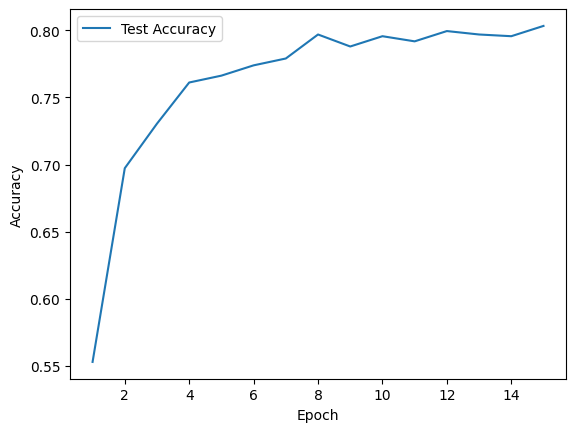

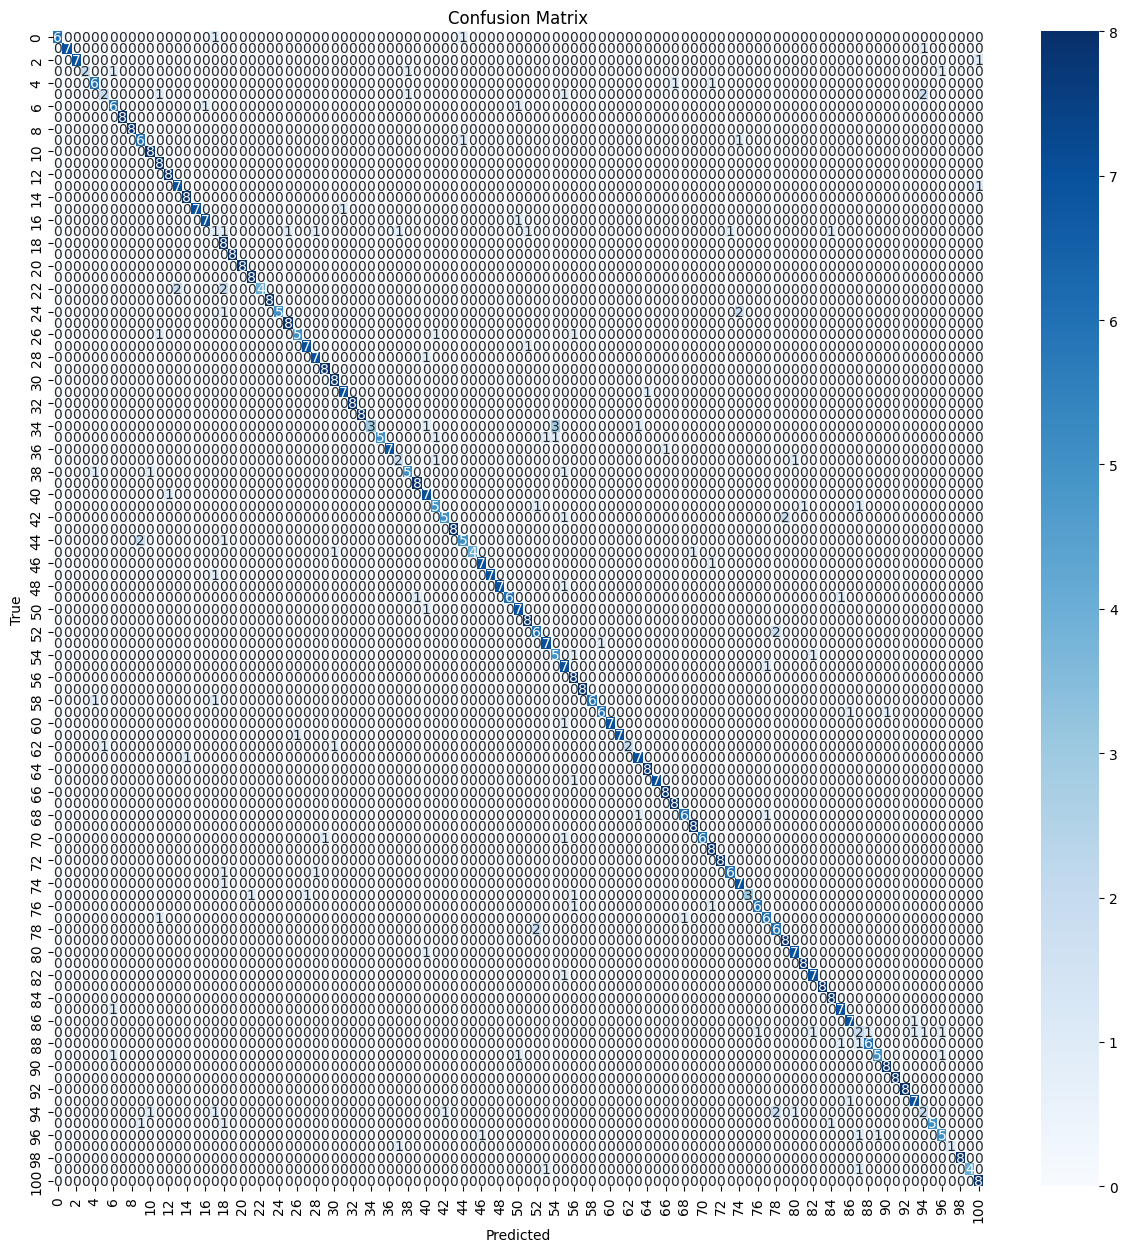

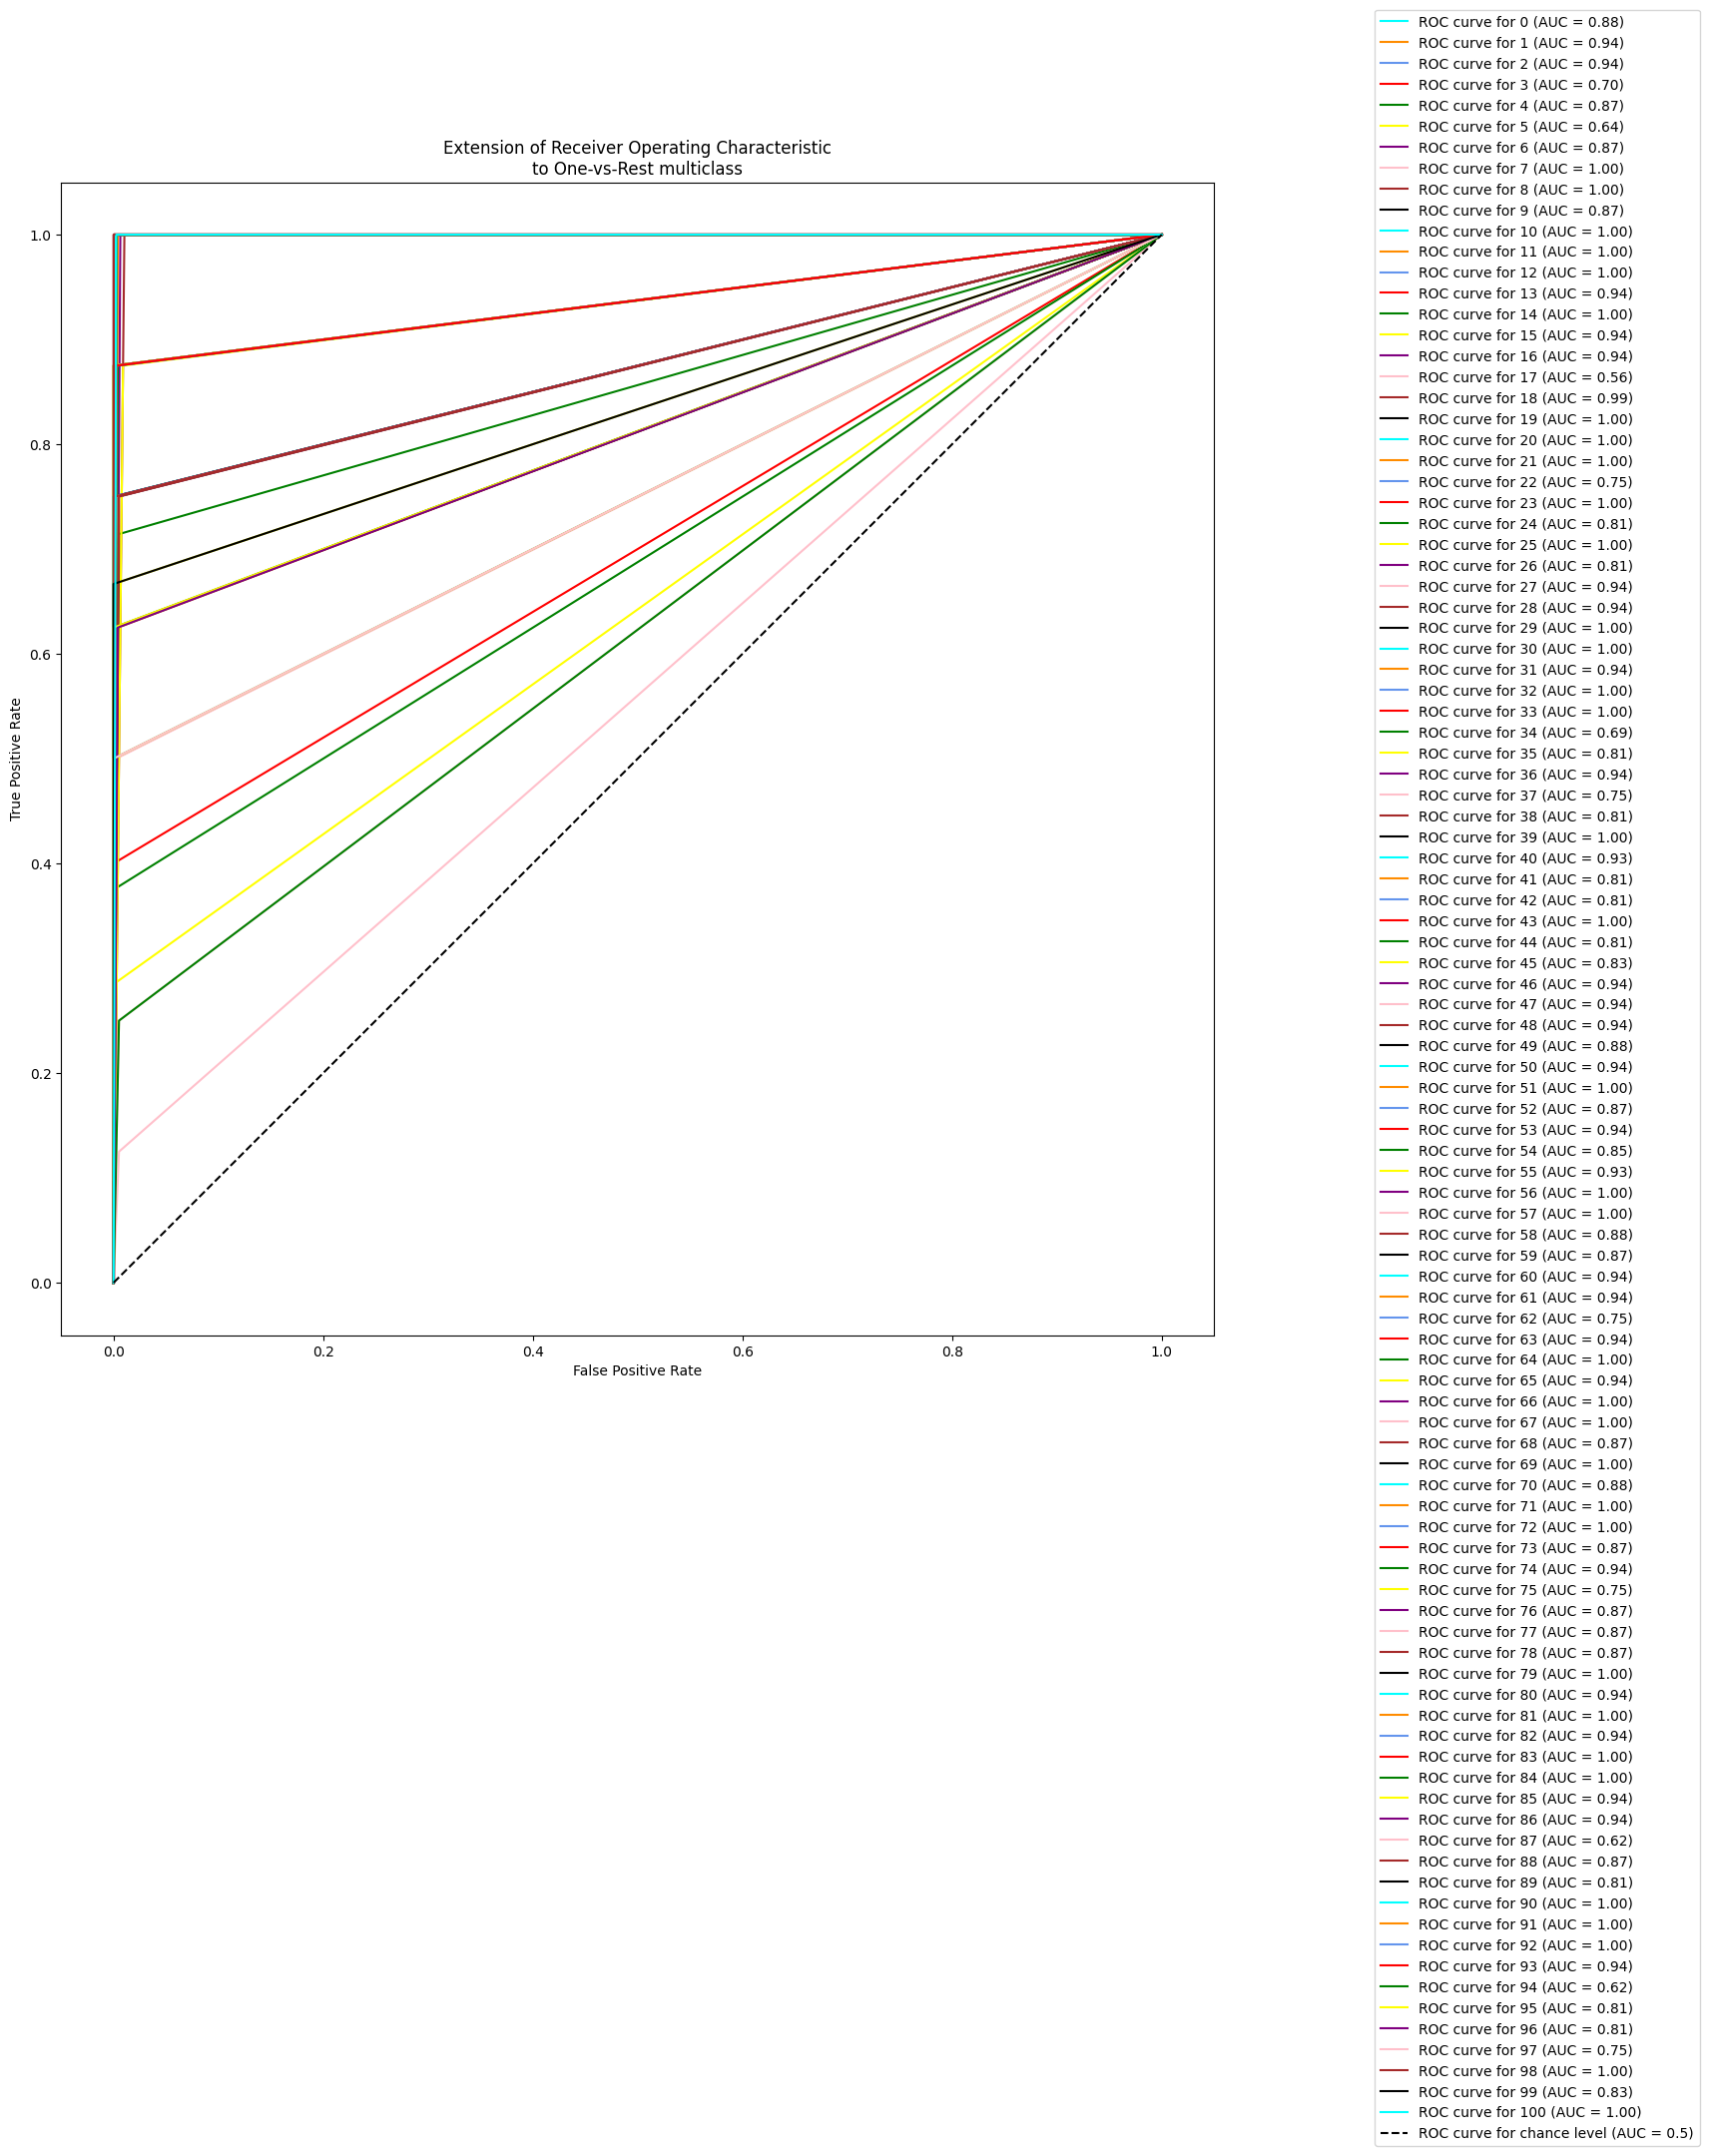

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      0.88      0.93         8
           2       1.00      0.88      0.93         8
           3       1.00      0.40      0.57         5
           4       0.75      0.75      0.75         8
           5       0.67      0.29      0.40         7
           6       0.67      0.75      0.71         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       0.67      0.75      0.71         8
          10       0.80      1.00      0.89         8
          11       0.73      1.00      0.84         8
          12       0.89      1.00      0.94         8
          13       0.78      0.88      0.82         8
          14       0.89      1.00      0.94         8
          15       1.00      0.88      0.93         8
          16       0.88      0.88      0.88         8
          17       0.20    

In [9]:
# Train early fusion model
print("Training Early Fusion Model:")

train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Epoch 1/15 - Test Accuracy: 0.5824
Epoch 2/15 - Test Accuracy: 0.6922
Epoch 3/15 - Test Accuracy: 0.7382
Epoch 4/15 - Test Accuracy: 0.7599
Epoch 5/15 - Test Accuracy: 0.7650
Epoch 6/15 - Test Accuracy: 0.7701
Epoch 7/15 - Test Accuracy: 0.7816
Epoch 8/15 - Test Accuracy: 0.7905
Epoch 9/15 - Test Accuracy: 0.7905
Epoch 10/15 - Test Accuracy: 0.7957
Epoch 11/15 - Test Accuracy: 0.7944
Epoch 12/15 - Test Accuracy: 0.7969
Epoch 13/15 - Test Accuracy: 0.7982
Epoch 14/15 - Test Accuracy: 0.7957
Epoch 15/15 - Test Accuracy: 0.7982


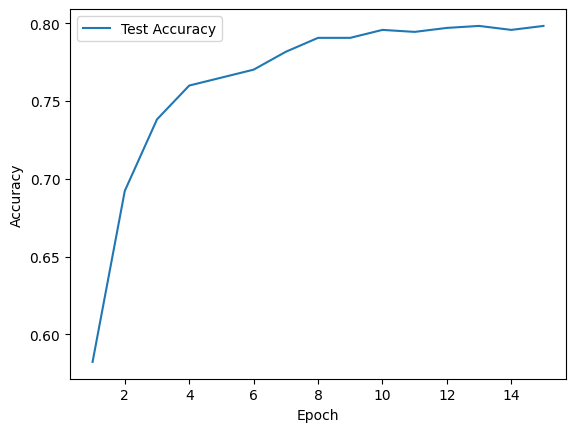

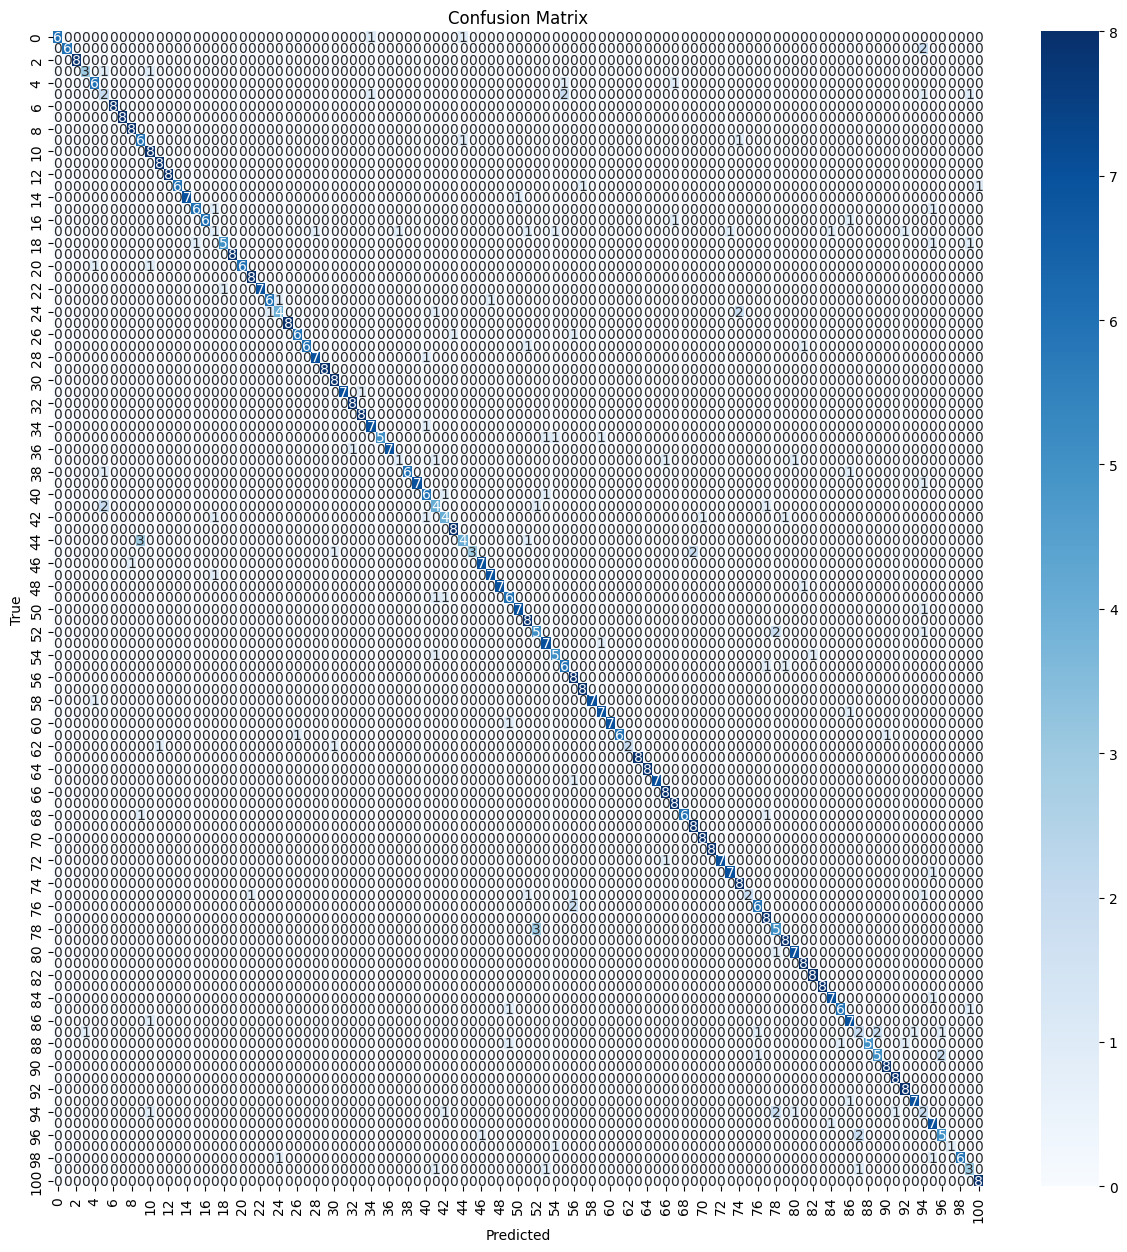

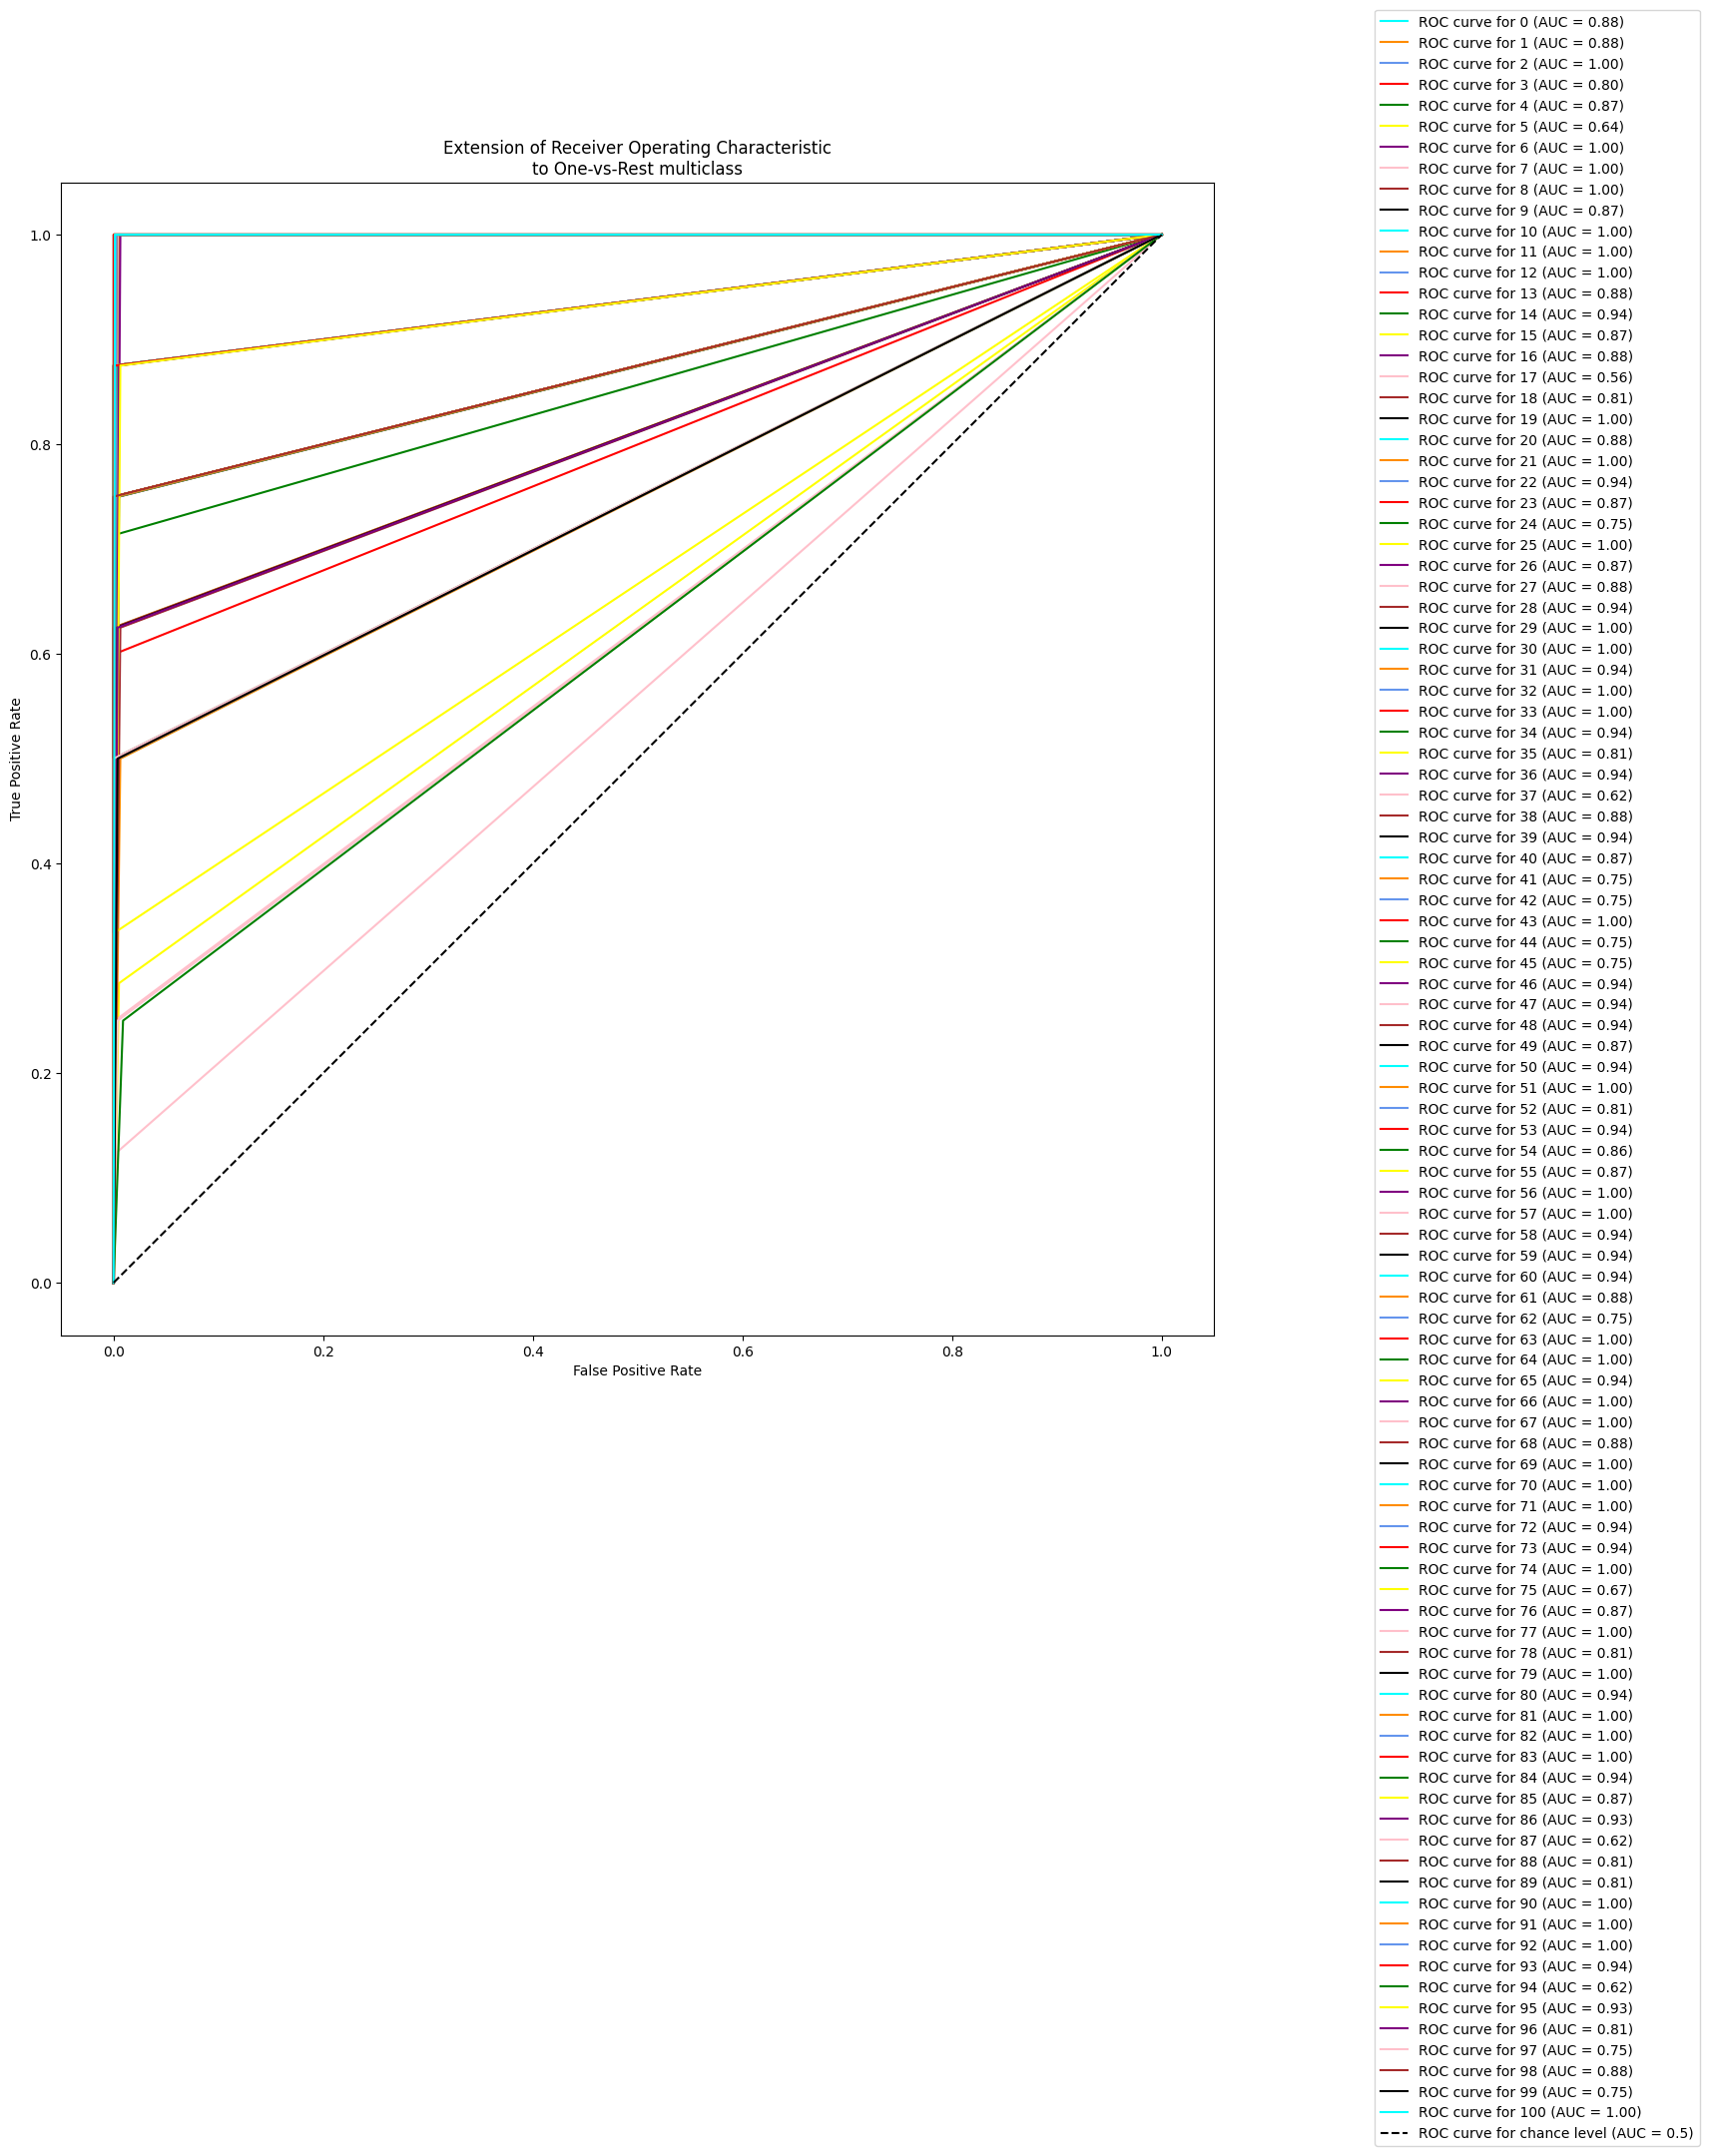

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         8
           3       0.75      0.60      0.67         5
           4       0.75      0.75      0.75         8
           5       0.33      0.29      0.31         7
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       0.89      1.00      0.94         8
           9       0.60      0.75      0.67         8
          10       0.67      1.00      0.80         8
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00         8
          13       1.00      0.75      0.86         8
          14       1.00      0.88      0.93         8
          15       0.86      0.75      0.80         8
          16       1.00      0.75      0.86         8
          17       0.25    

In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)